In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import os


In [11]:
# Load the data
data = pd.read_csv('../../Observados/HoraYdireccion_Obs.csv')

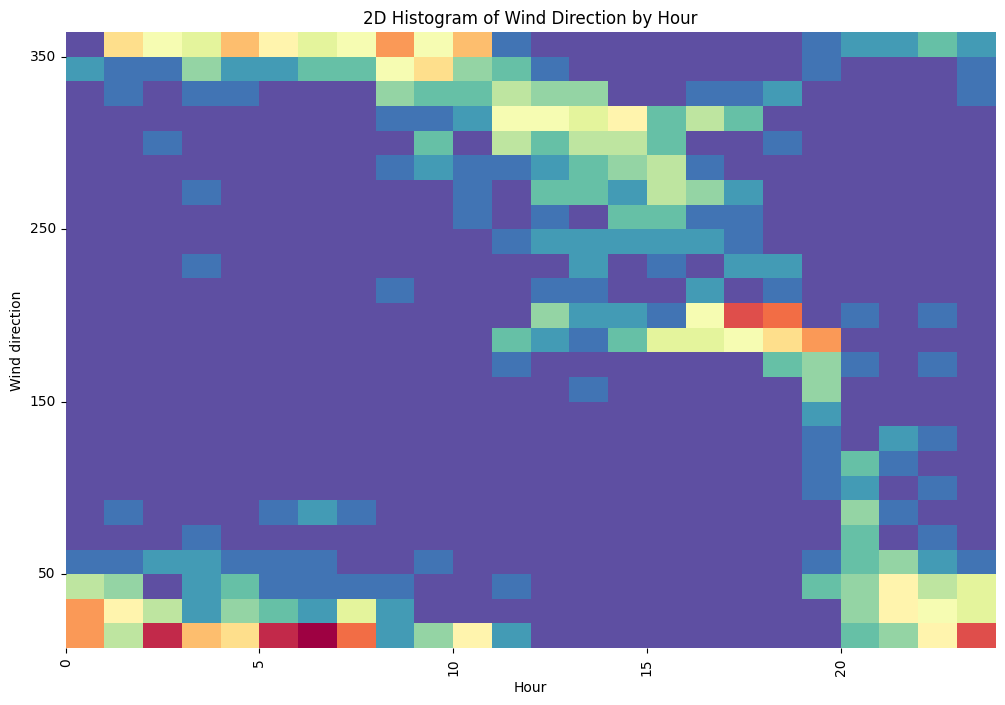

In [13]:

# Define bins for "hora" and "wd" values
hora_bins = np.linspace(-0.5, 23.5, 25)  # 24 bins
wd_bins = np.linspace(0, 360, 26)  # 25 bins

# Assign each "hora" and "wd" value to a bin
data['hora_bin'] = pd.cut(data['hora'], bins=hora_bins)
data['wd_bin'] = pd.cut(data['wd'], bins=wd_bins)

# Calculate count for each combination of "hora_bin" and "wd_bin"
data_2d = data.groupby(['hora_bin', 'wd_bin']).size().unstack(fill_value=0)

# Transpose data for plotting
data_2d_t = data_2d.transpose()

# Define the reversed 'Spectral' colormap with 32 color levels
cmap = LinearSegmentedColormap.from_list('Spectral_r', plt.cm.Spectral_r(np.linspace(0, 1, 32)))

# Define x-ticks and labels
xticks = [np.argmin(abs(hora_bins - val)) for val in [0, 5, 10, 15, 20]]
xticklabels = [0, 5, 10, 15, 20]

# Define y-ticks and labels
yticks = [np.argmin(abs(wd_bins - val)) for val in [50, 150, 250, 350]]
yticklabels = [50, 150, 250, 350]

# Plot the heatmap using seaborn with adjusted figure size and no color bar
plt.figure(figsize=(12, 8))
ax = sns.heatmap(data_2d_t, cmap=cmap, cbar=False)
ax.invert_yaxis()  # Reverse y-axis
plt.xticks(ticks=xticks, labels=xticklabels)
plt.yticks(ticks=yticks, labels=yticklabels)
plt.xlabel('Hour')
plt.ylabel('Wind direction')
plt.title('2D Histogram of Wind Direction by Hour')
plt.show()


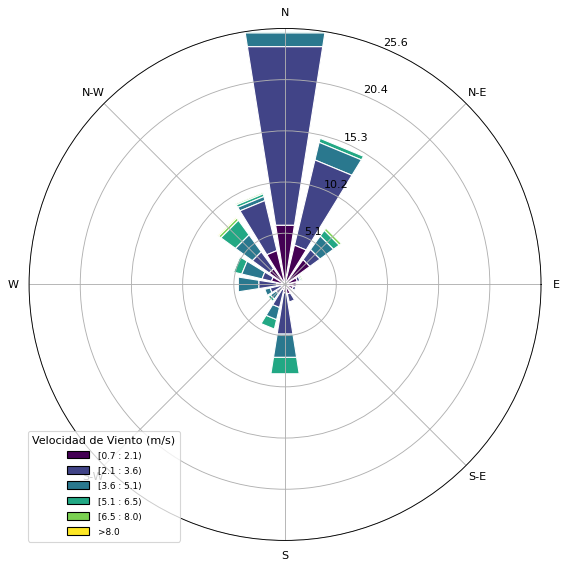

In [20]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

data_wind = pd.read_csv('../../Observados/Met_Observados.csv')

# Create a new windrose axes
ax = WindroseAxes.from_ax()

# Create the wind rose plot
ax.bar(data_wind['wd'], data_wind['ws'], normed=True, opening=0.8, edgecolor='white')

# Set labels
ax.set_legend(title='Velocidad de Viento (m/s)')

plt.show()
